# Examinie silicon
Check the silicon data.

First check the energy relation between the two layers of silicon detectors.

In [1]:
from spyral.core.silicon_point import SiliconPoint
from spyral.core.run_stacks import form_run_string

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path 
import h5py as h5
import itertools

%matplotlib widget

In [2]:
# Some parameters
workspace_path = Path("/data/sustech/user/pupu/spyraline/")
pointcloud_path = workspace_path / "Pointcloud" # this may change if you add custom phases!

run_number = 1056
point_file_path = pointcloud_path / f"{form_run_string(run_number)}.h5"
point_file = h5.File(point_file_path, 'r')

cloud_group: h5.Group = point_file.get('cloud')
min_event = cloud_group.attrs['min_event']
max_event = cloud_group.attrs['max_event']
print(f"First event: {min_event} Last event: {max_event}")

First event: 0 Last event: 27506


## Analysis
First, check the energy.

In [ ]:
energy = [[], [], [], []]
for idx in range(min_event, max_event+1):
    event_name = f"silicon_{idx}"
    if event_name not in cloud_group:
        continue
    silicon_data = cloud_group[event_name]
    for row in silicon_data:
        energy[int(row[0]*2+row[1])].append(row[3])

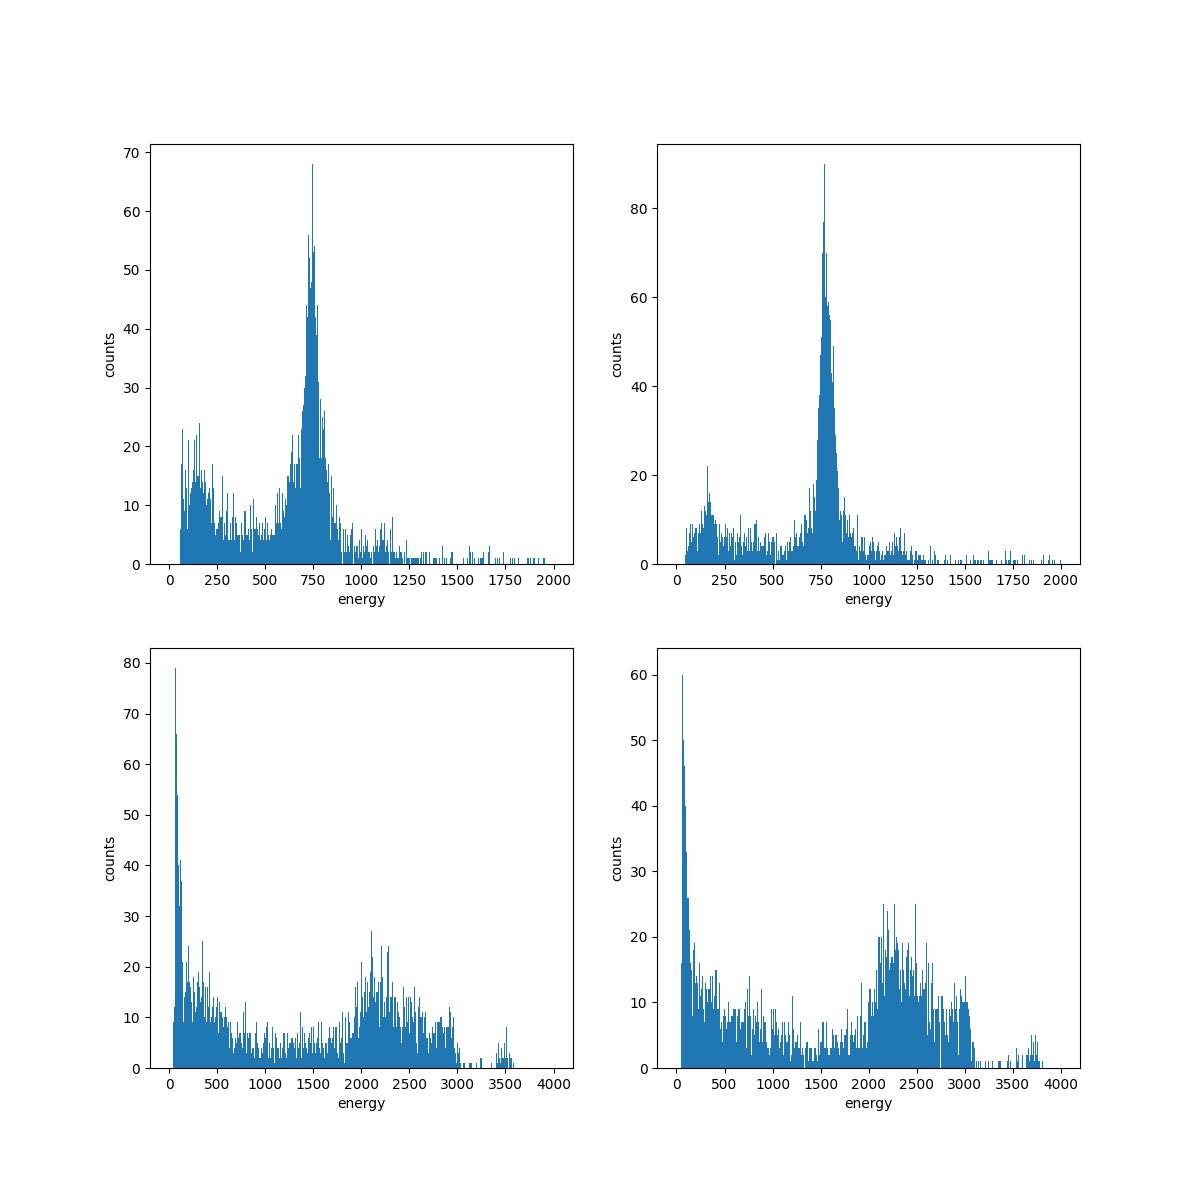

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12.0, 12.0))
hist_range = [2000, 2000, 4000, 4000]
for idx, ax in enumerate(axes.flatten()):
    ax.hist(energy[idx], bins=1000, range=[0, hist_range[idx]])
    ax.set_xlabel("energy")
    ax.set_ylabel("counts")
plt.show()

In [ ]:
correlated_strip_pairs = [[], []]
neighbor_strip_pairs = [[], [], [], []]
energy_pair = [[], []]
for idx in range(min_event, max_event+1):
    event_name = f"silicon_{idx}"
    if event_name not in cloud_group:
        continue
    silicon_data = cloud_group[event_name]
    # silicon = SiliconPoint(idx, silicon_data[:].copy())
    for row1, row2 in itertools.permutations(silicon_data, 2):
        if row1[3] < 150 or row2[3] < 150:
            continue
        if row1[0] == 0 and row1[1] == 1 and row2[0] == 1 and row2[1] == 1:
            energy_pair[0].append(row1[3])
            energy_pair[1].append(row2[3])
        if row1[0] == row2[0] and row1[1] == 0 and row2[1] == 1:
            correlated_strip_pairs[int(row1[0])].append((int(row1[2]), int(row2[2])))
        if row1[0] == row2[0] and row1[1] == row2[1]:
            if row1[2] >= row2[2]:
                continue
            neighbor_strip_pairs[int(row1[0]*2+row1[1])].append((int(row1[2]), int(row2[2])))


correlated_strips = [np.array(correlated_strip_pairs[0]), np.array(correlated_strip_pairs[1])]
neighbor_strip = [
    np.array(neighbor_strip_pairs[0]),
    np.array(neighbor_strip_pairs[1]),
    np.array(neighbor_strip_pairs[2]),
    np.array(neighbor_strip_pairs[3]),
]

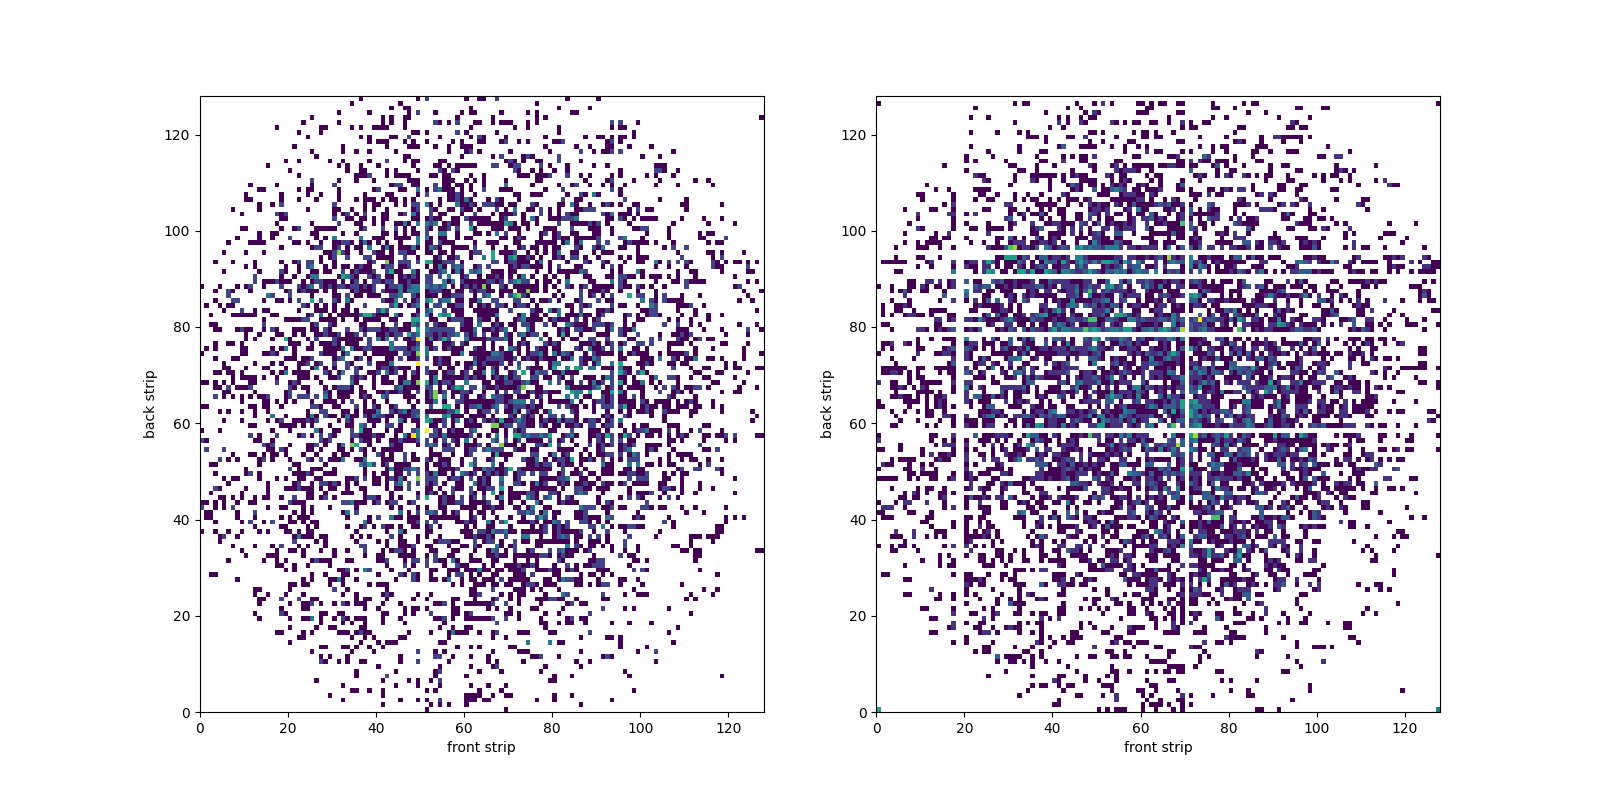

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16.0, 8.0))
for idx, ax in enumerate(axes):
    ax.hist2d(
        correlated_strips[idx][:, 0],
        correlated_strips[idx][:, 1],
        bins=[128, 128],
        range=[[0, 128], [0, 128]],
        cmin=1
    )
    ax.set_xlabel("front strip")
    ax.set_ylabel("back strip")
plt.show()

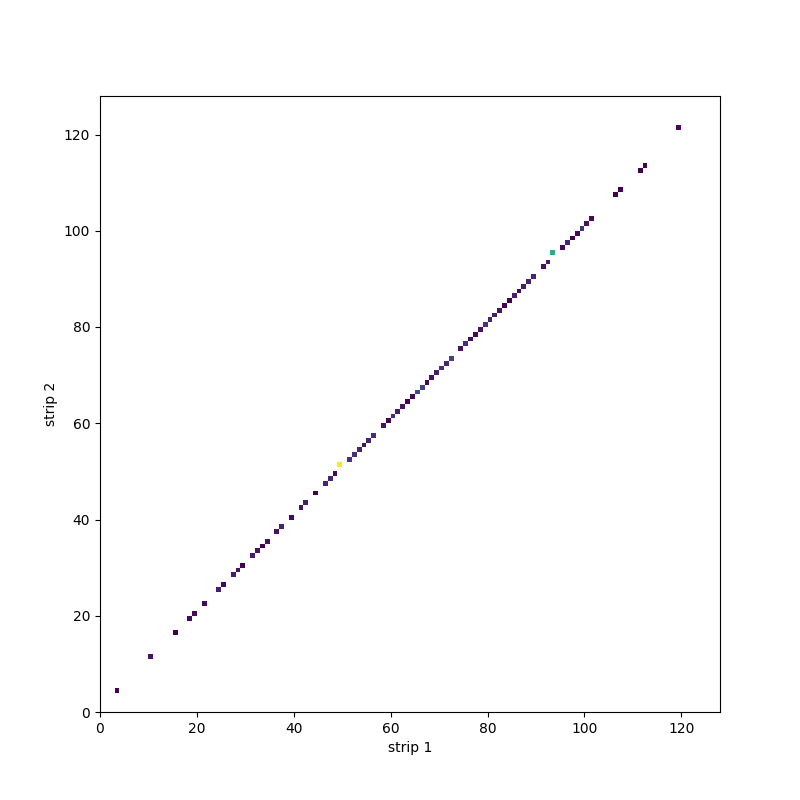

In [ ]:
idx = 0
fig, ax = plt.subplots(1, 1, figsize=(8.0, 8.0))
ax.hist2d(neighbor_strip[idx][:, 0], neighbor_strip[idx][:, 1], bins=[128, 128], range=[[0, 128], [0, 128]], cmin=3)
ax.set_xlabel("strip 1")
ax.set_ylabel("strip 2")
plt.show()

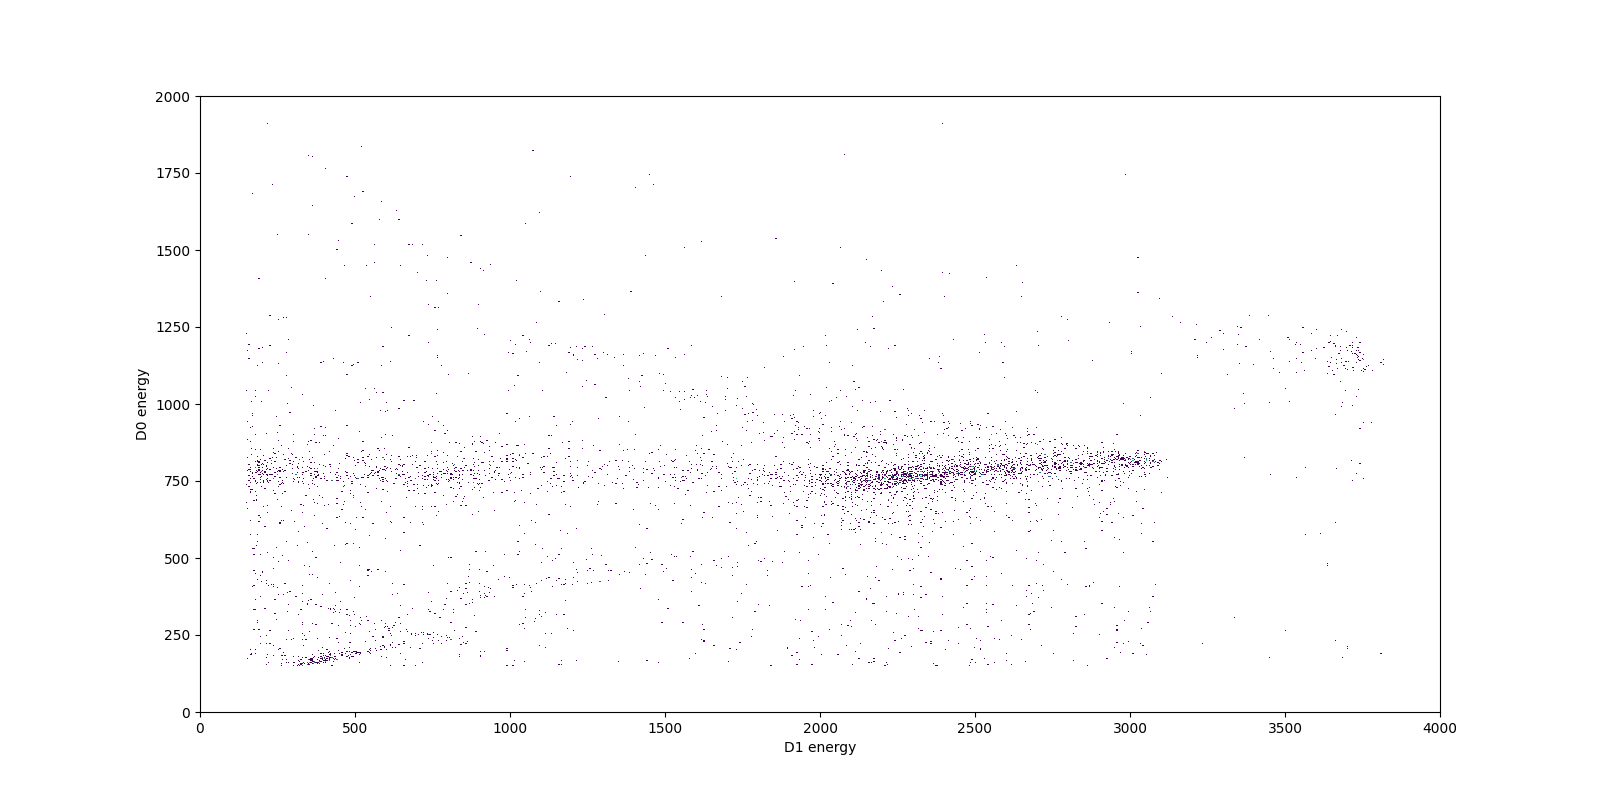

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16.0, 8.0))
ax.hist2d(energy_pair[1], energy_pair[0], bins=[1000, 1000], range=[[0, 4000], [0, 2000]], cmin=1)
ax.set_xlabel("D1 energy")
ax.set_ylabel("D0 energy")
plt.show()